# Data Analysis
This notebook is meant for exploritory analysis and in depth analysis of data on reddit users. Note: comments are not studied in this notebook because they are not central to the research (outside of determining pagerank) and they take a very long time to load.

## Setup

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
# Configurable constants
subreddit = "Showerthoughts"
download_date_string = "19.12.05-20:40:00"

data_directory = "data/"

# Derived constants
submissions_file = data_directory + subreddit + "-augmented-submissions-" + download_date_string + ".csv"
users_file = data_directory + subreddit + "-users-" + download_date_string + ".csv"

## Read Data

In [61]:
submissions = pd.read_csv(submissions_file, index_col=0)
submissions.head()

,index,submission_id,user,utc,score,title,body,subreddit,date,content,word_p_dist,entropy,novelty,transience,novelty_5,transience_5,impact,impact_5
0,977,e6eozq,victor_knight,1.575537e+09,11,We tend to think we're very advanced today but...,NaN,Showerthoughts,2019-12-05 09:07:33,We tend to think we're very advanced today but...,"{'We': 0.045454545454545456, 'tend': 0.0454545...",4.368523,NaN,8.892645,NaN,8.392191,NaN,NaN
1,976,e6epzy,GarunixReborn,1.575537e+09,109,The fact that people don’t walk up escalators ...,NaN,Showerthoughts,2019-12-05 09:10:45,The fact that people don’t walk up escalators ...,"{'The': 0.06666666666666667, 'fact': 0.0666666...",3.906891,9.341699,9.362215,NaN,9.132241,-0.020516,NaN
2,975,e6eqyr,Sable_Industries,1.575537e+09,0,Someone out there probably has the social secu...,NaN,Showerthoughts,2019-12-05 09:14:00,Someone out there probably has the social secu...,"{'Someone': 0.1, 'out': 0.1, 'there': 0.1, 'pr...",3.321928,9.936087,9.079592,NaN,9.212662,0.856496,NaN
3,974,e6es55,DUIofPussy,1.575537e+09,7,Since a person’s ability to comprehend is dete...,NaN,Showerthoughts,2019-12-05 09:17:54,Since a person’s ability to comprehend is dete...,"{'Since': 0.03333333333333333, 'a': 0.1, 'pers...",4.681728,8.259839,6.896594,NaN,7.185452,1.363246,NaN
4,973,e6es6v,-Hi_2019,1.575537e+09,9,If school isn't a place to play then home shou...,NaN,Showerthoughts,2019-12-05 09:18:07,If school isn't a place to play then home shou...,"{'If': 0.06666666666666667, 'school': 0.066666...",3.506891,6.737337,9.120991,NaN,9.080047,-2.383654,NaN


In [62]:
users = pd.read_csv(users_file, index_col=0)
users.head()

,num_posts,max_score_submissions,mean_score_submissions,min_score_submissions,mean_length_submissions,mean_impact,mean_novelty,mean_transience,mean_impact_5,mean_novelty_5,mean_transience_5,num_comments,max_score_comments,mean_score_comments,min_score_comments,mean_length_comments,pagerank
user,,,,,,,,,,,,,,,,,
--insertnamehere--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.000000,1.0,27.000000,0.000184
-AlienBoy-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,1.666667,1.0,67.333333,0.000184
-Asher-,1.0,0.0,0.0,0.0,48.0,0.025029,9.947869,9.922841,0.010955,9.752601,9.741647,NaN,NaN,NaN,NaN,NaN,0.000262
-DementedAvenger-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.000000,1.0,24.000000,0.000184
-Dubzyboy-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.000000,2.0,5.000000,0.000184


## Exploritory Data Analysis
Lets get a feel for the data

In [63]:
users.columns

Index(['num_posts', 'max_score_submissions', 'mean_score_submissions',
       'min_score_submissions', 'mean_length_submissions', 'mean_impact',
       'mean_novelty', 'mean_transience', 'mean_impact_5', 'mean_novelty_5',
       'mean_transience_5', 'num_comments', 'max_score_comments',
       'mean_score_comments', 'min_score_comments', 'mean_length_comments',
       'pagerank'],
      dtype='object')

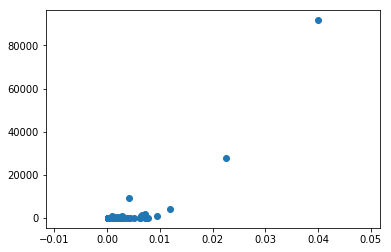

In [64]:
# mean score vs pagerank
plt.scatter(x=users['pagerank'], y=users['mean_score_submissions'])
plt.show()

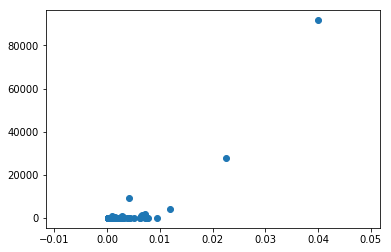

In [65]:
# min score vs pagerank
plt.scatter(x=users['pagerank'], y=users['min_score_submissions'])
plt.show()

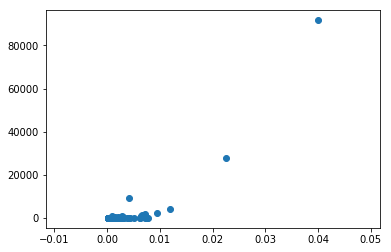

In [66]:
# max score vs pagerank
plt.scatter(x=users['pagerank'], y=users['max_score_submissions'])
plt.show()

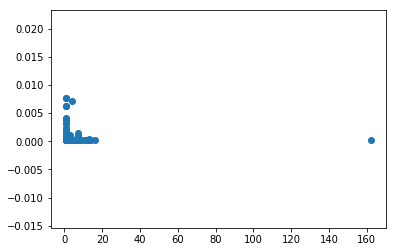

In [67]:
# number of comments vs pagerank
plt.scatter(x=users['num_comments'], y=users['pagerank'])
plt.show()

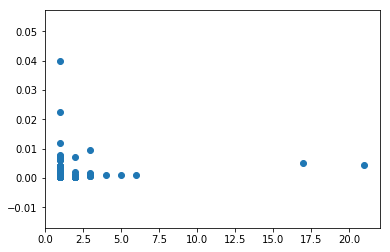

In [68]:
# number of posts vs pagerank - should be correlated (more submissions to comment on)
plt.scatter(x=users['num_posts'], y=users['pagerank'])
plt.show()
# okay, my hypothesis was wrong...

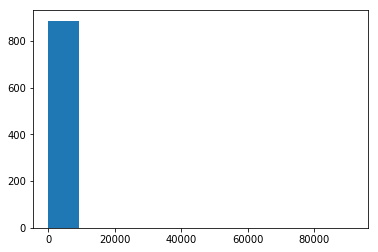

In [69]:
plt.hist(users['mean_score_submissions'])
plt.show()

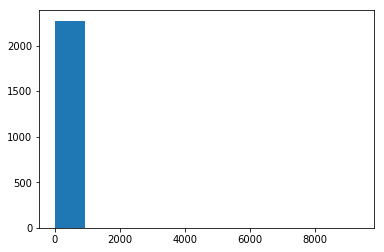

In [70]:
plt.hist(users['mean_score_comments'])
plt.show()

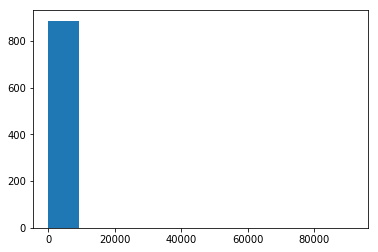

In [71]:
plt.hist(users['max_score_submissions'])
plt.show()

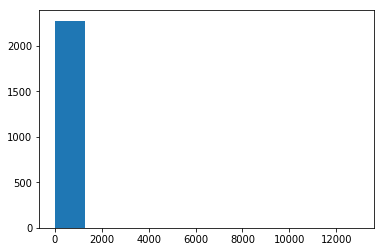

In [72]:
plt.hist(users['max_score_comments'])
plt.show()

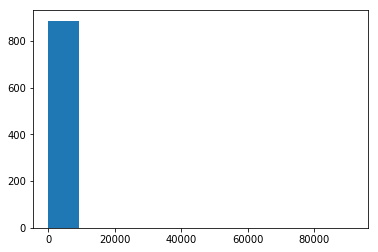

In [73]:
plt.hist(users['min_score_submissions'])
plt.show()

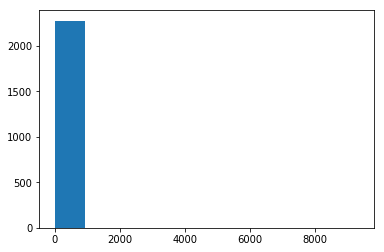

In [74]:
plt.hist(users['min_score_comments'])
plt.show()

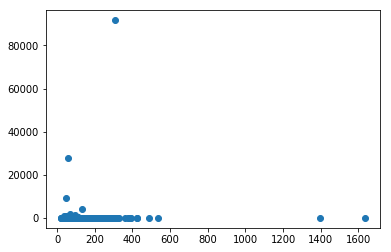

In [75]:
plt.scatter(x=users['mean_length_submissions'], y=users['mean_score_submissions'])
plt.show()

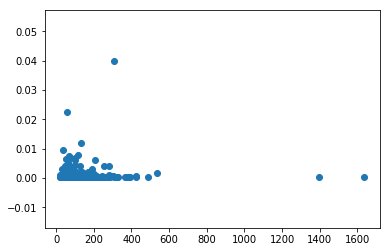

In [76]:
plt.scatter(x=users['mean_length_submissions'], y=users['pagerank'])
plt.show()

## Just Submission Stuff

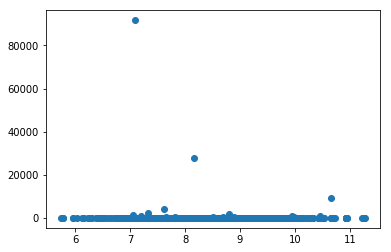

In [77]:
plt.scatter(x=submissions['novelty'], y=submissions['score'])
plt.show()

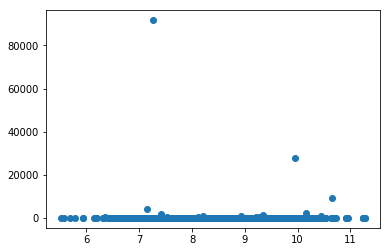

In [78]:
plt.scatter(x=submissions['transience'], y=submissions['score'])
plt.show()

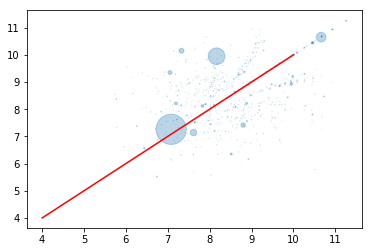

In [79]:
# novelty-transcience plot
plt.scatter(x=submissions['novelty'], y=submissions['transience'], s=submissions['score'] / 100, alpha=0.3)

# add line of equality
domain = np.arange(4, 11)
plt.plot(domain, domain, color='red')
plt.show()

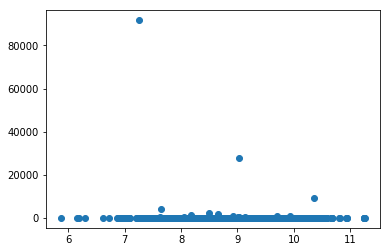

In [80]:
plt.scatter(x=submissions['novelty_5'], y=submissions['score'])
plt.show()

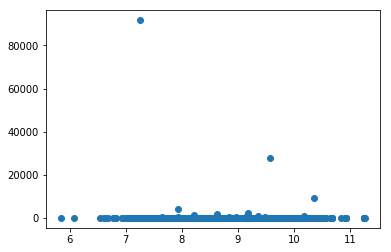

In [81]:
plt.scatter(x=submissions['transience_5'], y=submissions['score'])
plt.show()

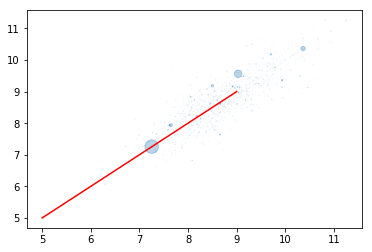

In [82]:
# novelty-transcience plot
plt.scatter(x=submissions['novelty_5'], y=submissions['transience_5'], s=submissions['score'] / 500, alpha=0.3)

# add line of equality
domain = np.arange(5, 10)
plt.plot(domain, domain, color='red')
plt.show()

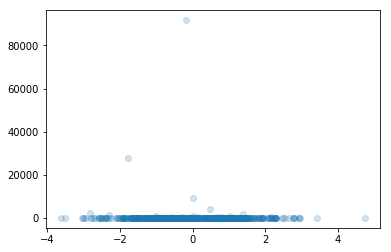

In [83]:
plt.scatter(x=submissions['impact'], y=submissions['score'], alpha=0.2)
plt.show()

## Users and KLD

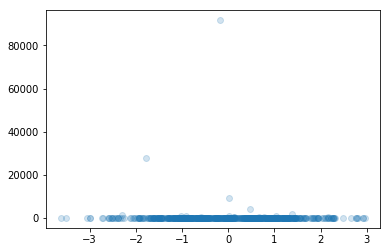

In [84]:
plt.scatter(x=users['mean_impact'], y=users['mean_score_submissions'], alpha=0.2)
plt.show()

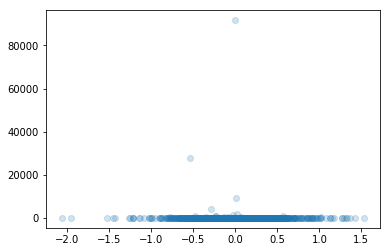

In [85]:
plt.scatter(x=users['mean_impact_5'], y=users['mean_score_submissions'], alpha=0.2)
plt.show()

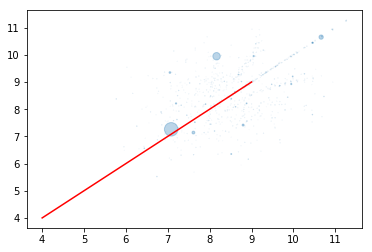

In [86]:
# novelty-transcience plot
plt.scatter(x=users['mean_novelty'], y=users['mean_transience'], s=users['mean_score_submissions'] / 500, alpha=0.3)

# add line of equality
domain = np.arange(4, 10)
plt.plot(domain, domain, color='red')
plt.show()

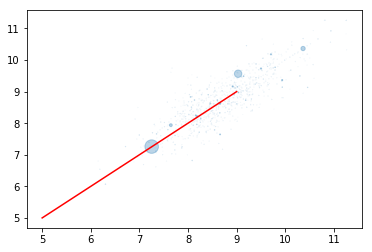

In [87]:
# novelty-transcience plot
plt.scatter(x=users['mean_novelty_5'], y=users['mean_transience_5'], s=users['mean_score_submissions'] / 500, alpha=0.3)

# add line of equality
domain = np.arange(5, 10)
plt.plot(domain, domain, color='red')
plt.show()

## Pagerank and KLD for Users!!!

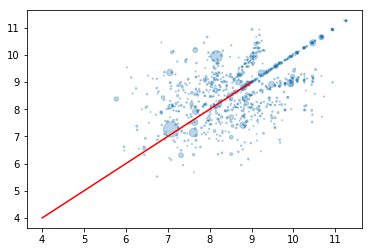

In [88]:
# novelty-transcience plot
plt.scatter(x=users['mean_novelty'], y=users['mean_transience'], s=users['pagerank']*6000, alpha=0.3)

# add line of equality
domain = np.arange(4, 10)
plt.plot(domain, domain, color='red')
plt.show()

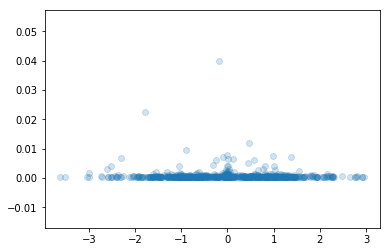

In [89]:
plt.scatter(x=users['mean_impact'], y=users['pagerank'], alpha=0.2)
plt.show()

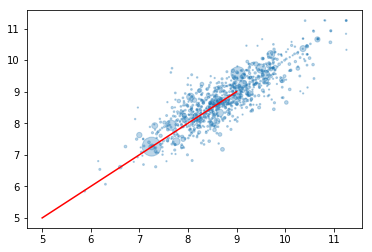

In [90]:
# novelty-transcience plot
plt.scatter(x=users['mean_novelty_5'], y=users['mean_transience_5'], s=users['pagerank']*9000, alpha=0.3)

# add line of equality
domain = np.arange(5, 10)
plt.plot(domain, domain, color='red')
plt.show()

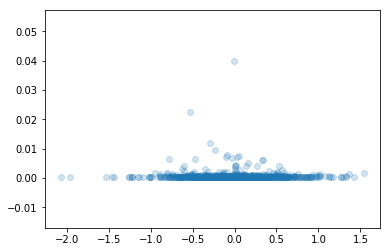

In [91]:
plt.scatter(x=users['mean_impact_5'], y=users['pagerank'], alpha=0.2)
plt.show()

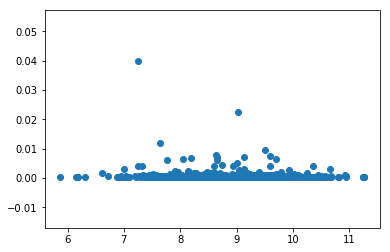

In [92]:
plt.scatter(x=users['mean_novelty_5'], y=users['pagerank'])
plt.show()